# Evidence of Discrimination?

The Department of Developmental Services (DDS) in California is responsible for allocating funds to support over 250,000 developmentally-disabled residents. The data set `https://dlsun.github.io/pods/data/ca_dds_expenditures.csv` contains data about 1,000 of these residents. The data comes from a discrimination lawsuit which alleged that California's Department of Developmental Services (DDS) privileged white (non-Hispanic) residents over Hispanic residents in allocating funds. We will focus on comparing the allocation of funds (i.e., expenditures) for these two ethnicities only, although there are other ethnicities in this data set.

There are 6 variables in this data set:

- Id:  5-digit, unique identification code for each consumer (similar to a social security number and used for identification purposes)  
- Age Cohort:  Binned age variable represented as six age cohorts (0-5, 6-12, 13-17, 18-21, 22-50, and 51+)
- Age:  Unbinned age variable
- Gender:  Male or Female
- Expenditures:  Dollar amount of annual expenditures spent on each consumer
- Ethnicity:  Eight ethnic groups (American Indian, Asian, Black, Hispanic, Multi-race, Native Hawaiian, Other, and White non-Hispanic)

# Question 1

Read in the data set. Make a graphic that compares the _average_ expenditures by the DDS on Hispanic residents and white (non-Hispanic) residents. Comment on what you see.

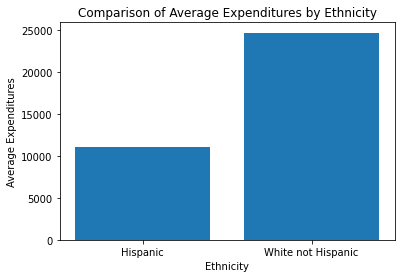

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

data_dir = "https://dlsun.github.io/pods/data/"
df_dds = pd.read_csv(data_dir + "ca_dds_expenditures.csv")
hispanic_exp_mean = df_dds[(df_dds["Ethnicity"] == "Hispanic")]["Expenditures"].mean()
white_exp_mean = df_dds[(df_dds["Ethnicity"] == "White not Hispanic")]["Expenditures"].mean()

labels = ['Hispanic', 'White not Hispanic']
heights = [hispanic_exp_mean, white_exp_mean]

plt.bar(labels, heights)
plt.xlabel('Ethnicity')
plt.ylabel('Average Expenditures')
plt.title('Comparison of Average Expenditures by Ethnicity')
plt.show()

**YOUR EXPLANATION HERE**

According to the chart above, it would appear that people of White not Hispanic ethnicity, on average, have more than double the expenditures of people of Hispanic ethnicity. 

# Question 2

Now, calculate the average expenditures by ethnicity and age cohort. Make a graphic that compares the average expenditure on Hispanic residents and white (non-Hispanic) residents, _within each age cohort_. 

Comment on what you see. How do these results appear to contradict the results you obtained in Question 1?

In [ ]:
# YOUR CODE HERE
avg_exp_by_ethnicity_age_cohort = df_dds[(df_dds["Ethnicity"] == "Hispanic") | (df_dds["Ethnicity"] == "White not Hispanic")].groupby(['Age Cohort', 'Ethnicity'])['Expenditures'].mean().reset_index()

# Create a bar chart to compare the average expenditures by ethnicity and age cohort
Chart(avg_exp_by_ethnicity_age_cohort).mark_bar().encode(
    x='Age Cohort',
    y='Expenditures',
    color='Ethnicity'
)

alt.Chart(...)

**YOUR EXPLANATION HERE**

According to the above chart, it would appear that the average expenditure on Hispanic residents and white residents within each age cohort are roughly similar. These results contradict the results obtained in Question 1 because according to the results of Question 1, we would assume that White not Hispanic residents received more than twice the amount Hispanics received.

# Question 3

Can you explain the discrepancy between the two analyses you conducted above (i.e., Questions 1 and 2)? Try to tell a complete story that interweaves tables, graphics, and explanation.

_Hint:_ You might want to consider looking at:

- the distributions of ages of Hispanics and whites
- the average expenditure as a function of age

In [ ]:
df_hispanic_white = df_dds[(df_dds["Ethnicity"] == "Hispanic") | (df_dds["Ethnicity"] == "White not Hispanic")]

pd.crosstab(df_hispanic_white["Ethnicity"], df_hispanic_white["Age Cohort"])

Age Cohort,0 to 5,13 to 17,18 to 21,22 to 50,51+,6 to 12
Ethnicity,,,,,,
Hispanic,44,103,78,43,17,91
White not Hispanic,20,67,69,133,66,46


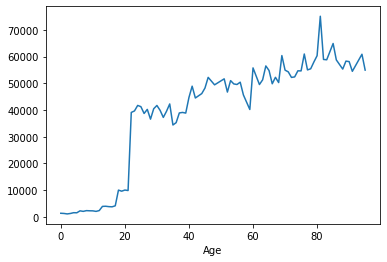

In [ ]:
df_dds['Avg_Expenditure'] = df_dds.groupby('Age')['Expenditures'].transform("mean")
# Create the dataframe
expenditure_by_age = df_dds.groupby('Age')['Avg_Expenditure'].mean()
expenditure_by_age.plot()

As you can see above, the younger age cohorts consists of much more hispanics while the older age cohorts consists of much more whites. Because older people require more expenditure, for question 1, it makes sense that white people have much higher expenditure than hispanic people

**YOUR EXPLANATION HERE (although you may want to add more markdown cells)**

## Submission Instructions

- Copy this notebook to your own Drive, if you have not already.
- Restart this notebook and run the cells from beginning to end. 
  - Go to Runtime > Restart and Run All.
- Rename this notebook by clicking on "DATA 301 Lab 2B - YOUR NAME HERE" at the very top of this page. Replace "YOUR NAMES HERE" with the first and last names of you (and your partners, for Phase 2).
- Get the link to your notebook:
  - Click on "Share" at the top-right. 
  - Change the settings to "Anyone with the link can view". 
  - Copy the sharing link into Canvas.